In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from glob import glob
import os.path
from matplotlib.pyplot import subplots
import numpy as np


%matplotlib inline

# Retrieve activity data from ChEMBL

In [2]:
import urllib2
import json
import re

In [3]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def get_ligands(accession):

    data = []

    target_data = json.loads(urllib2.urlopen("https://www.ebi.ac.uk/chemblws/targets/uniprot/%s.json" %
                                             accession).read())
    bioactivity_data = json.loads(urllib2.urlopen("https://www.ebi.ac.uk/chemblws/targets/%s/bioactivities.json" %
                                                  target_data['target']['chemblId']).read())

    for bioactivity in bioactivity_data['bioactivities']:
        
        if not is_number(bioactivity["value"]):
            continue

        row = {}
        
        for key in ["bioactivity_type", "operator", "value", "units", "target_chemblid",
                    "ingredient_cmpd_chemblid"]:
            row[key] = bioactivity[key]
        data.append(row)

    return data

In [4]:
names = []

if os.path.exists("../data/raw_data.csv"):
    all_data = pd.read_csv("../data/raw_data.csv", index_col=0)
    for i in glob("../data/targets/*"):
        name = i.split("/")[-1][:-4]
        print name
        names.append(name)

else:
    all_data = pd.DataFrame(columns=["name", "uniprot_name", "target_chemblid", "bioactivity_type", "operator",
                                     "value", "units", "ingredient_cmpd_chemblid"])

    for i in glob("../data/targets/*"):
        name = i.split("/")[-1][:-4]
        print name
        names.append(name)
        f = open(i)
        for line in f:
            tmp = line.split("\t")
            accession = tmp[0]
            uniprot_name = tmp[1]
            try:
                tmp_data = get_ligands(accession)
                if tmp_data:
                    tmp_pd = pd.DataFrame(data=tmp_data, columns=["name", "uniprot_name", "target_chemblid",
                                                                  "units", "bioactivity_type", "operator",
                                                                  "value", "ingredient_cmpd_chemblid"])
                    tmp_pd["name"] = name
                    tmp_pd["uniprot_name"] = uniprot_name

                    all_data = pd.concat([all_data, tmp_pd], ignore_index=True)
            except:
                continue

        f.close()
    all_data.to_csv("../data/raw_data.csv")

AVPR1A
PTGS2
HTR3A
CHRM2
DRD3
AR
DRD2
SCN5A
OPRK1
ADRA1A
CNR1
ESR2
GIPR
HTR2A
ADRB2
TACR1
SLC6A3
ADORA2A
GABRA1
EDNRB
HRH1
EDNRA
ADRA2A
HTR1A
DRD1
GHSR
CACNA1C
BDKRB2
PDE4D
GRIN3A
OPRM1
NR1I2
CCKBR
HTR2C
SLC6A2
OPRD1
CHRM1
SLC6A4
NTSR1
MC4R
HRH3
AGTR1
ADRB1
NR3C1
ADRA2B
MC3R
MAOA
CCKAR
ADRA2C
KCNH2
HRH2
ESR1
ADORA3
CRHR1
ADORA1
PTGS1
BDKRB1
HTR2B
SLC29A1
TBXA2R
DRD4
MLN
PDE3A
ADRB3
AVPR2
GPR109A
PGR
CACNA1B
NPY1R
CHRNA10
CRHR2
NPY2R
CHRM3


In [5]:
all_data["bioactivity_type"].unique()

array(['IC50', 'Inhibition', 'ID50', 'Ki', 'Vasopressor activity', 'Kd',
       'ED', 'Activity', 'pKi', 'EC50', 'RA', 'Log Ki', 'Kinact',
       'Efficacy', 'ED50', 'Change', 'Selectivity', 'Km', 'Ratio IC50',
       'Ratio', 'Imax', 'Enzyme inhibition', 'Delta G', 'Fold change',
       '-log(RatioIC50)', 'INH', 'IC60', 'FC', 'IC80', 'pD2',
       'Intrinsic activity', 'Control', 'pK1', 'Selectivity ratio', 'pKD',
       'Kb', '-Log KB', 'IA', 'pKB', '-Log ED50', 'pA2', 'pKb', 'p[A50]',
       'Agonist activity', 'Vmax', 'Emax', 'nH', 'Log EC50', 'Emax,diss',
       'pAlpha', 'pEC0.5,diss', 'pKA', 'Palpha', 'pKa', 'pEC50 diss',
       'p alpha', 'p alphaKa', 'EC25', 'EC0.25', 'pEC0.5', 'Efficiency',
       'K app', 'Muscarinic receptor affinity', 'Ki ratio',
       'Max stimulation', 'Efficacy ratio', 'KA', 'RBI',
       'Muscarinic agonist index', 'Displacement', 'KH', 'KL', 'Binding',
       'K0.5', 'Analgesic efficacy', 'Cooperativity', 'Log 1/M', 'CCh',
       'EC80', 'Bmax', 'Inc

In [6]:
all_data["units"].unique()

array(['nM', '%', 'umol.kg-1', 'U mg-1', 'nM kg-1', 'IU mg-1',
       'Unspecified', 'mg.kg-1', 'ug.mL-1',
       '(ng of PGE2) (mg of protein)-1', 'kCal M-1', 'uM', 'ug', 'ug kg-1',
       'M-1', 'M', 'pM mg-1', 'hr', 'turns min-1', 'ng mg-1',
       'fM (mg of protein)-1', 'mg', 'mM', 'mg animal-1 day-1', 'Ci mM-1',
       'fM mg-1', 'ng ml-1', 'pM (mg of protein)-1', 'fmol/mg', 'min',
       'nM-1', 'mg kg-1', 'fmol mg-1', 'Ratio', 'Ke nM-1', 'pmol/mg',
       'pmol', 'pmol mg-1', 'mg kg-1 day-1', 'g', 'fM uterus-1',
       'mg 100g-1', 'mg cm-3', 'nM g-1', 'hr min-1', 'fmol', "10'-7M",
       "10'-8M", "10'-5M", "10'-10M", 'pmol/mg/min', 'pM min-1 mg-1',
       "10'5/M/s", 'uM kg-1', "10'6/M/s", 'uM g kg-1', 'dose ratio',
       'ng/ml', 'min-1', 'pmol/min', '% (at concentration M)', 'pmol/ml',
       's-1', 'fM spec bound (mg protein)-1', 'fM assay-1', 'pCi mg-1',
       'uM/L', 'pA2', 'AUC units', 'ug min-1 kg-1', 'nM L-1 hr-1',
       '(fM of GTP-gammaS bound) (mg of protein)-1'

In [7]:
len(all_data["uniprot_name"].unique())

324

In [8]:
all_data["value"] = all_data["value"].astype(float)

In [9]:
idx_op = ((all_data["operator"] == "<") | (all_data["operator"] == "<=") |
          (all_data["operator"] == "=") | (all_data["operator"] == "~"))

idx_type = ((all_data["bioactivity_type"] == "IC50") | (all_data["bioactivity_type"] == "EC50") |
            (all_data["bioactivity_type"] == "Ki") | (all_data["bioactivity_type"] == "Kd"))

idx_val = (all_data["value"] <= 1000)
idx_units = (all_data["units"] == "nM")
idx_above0 = (all_data["value"] >= 0)

In [10]:
cleaned_data = all_data[idx_op & idx_type & idx_val & idx_units & idx_above0]
cleaned_data.to_csv("../data/cleaned_data.csv")

# Get SMILES

In [11]:
to_retrieve = list(cleaned_data["ingredient_cmpd_chemblid"].unique())

In [12]:
len(to_retrieve)

83592

In [13]:
def get_smiles(chembl_id):
    cmpd_data = json.loads(urllib2.urlopen("https://www.ebi.ac.uk/chemblws/compounds/%s.json" %
                                           chembl_id).read())
    if "smiles" not in cmpd_data["compound"]:
        return None
    else:
        return cmpd_data['compound']["smiles"]

In [14]:
if os.path.exists("../data/chembl_smiles.csv"):
    cmpd_smiles = pd.read_csv("../data/chembl_smiles.csv", index_col = 0)

else:
    smiles = []
    for i in xrange(len(to_retrieve)):
        if i%1000 == 0:
            print i
        smiles.append(get_smiles(to_retrieve[i]))
    cmpd_smiles = pd.DataFrame({"SMILES": smiles, "ingredient_cmpd_chemblid": to_retrieve})
    cmpd_smiles.to_csv("../data/chembl_smiles.csv")

In [15]:
without_smiles = (cmpd_smiles["SMILES"].isnull())
sum(without_smiles)

77

In [16]:
cmpd_with_smiles = cmpd_smiles.dropna()
with_smiles = pd.merge(cleaned_data, cmpd_with_smiles)

# Filter out long peptides

In [17]:
from pybel import Smarts, readstring, readfile
pept_bond = Smarts("[$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([*])[CX3](=[OX1])[OX2H,OX1-,N]")

In [18]:
def pept_len(x):
    # number of aminoacids in a molecule
    return len(pept_bond.findall(readstring("smi", x)))

In [19]:
with_smiles["pept"] = with_smiles.apply(lambda x: pept_len(str(x["SMILES"])), axis=1)

In [20]:
idx_nonpept = (with_smiles["pept"] < 20)
with_smiles = with_smiles[idx_nonpept]

In [21]:
cleaned_data.shape, with_smiles.shape

((228758, 8), (226998, 10))

In [22]:
targets_groups = with_smiles.groupby(["name"])
cmpd_uniq_counts = targets_groups.aggregate({"ingredient_cmpd_chemblid": lambda x: len(x.unique())})
cmpd_uniq_counts.columns = ["counts"]
cmpd_uniq_counts.head()

counts
name           
ADORA1     4136
ADORA2A    3413
ADORA3      190
ADRA1A     3174
ADRA2A     1392

In [23]:
cmpd_uniq_counts["counts"].min(), cmpd_uniq_counts["counts"].argmin()

(59, 'NR1I2')

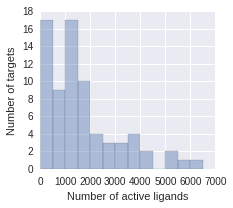

In [24]:
f, ax = subplots(figsize=(3.35,3), dpi=300)
sns.distplot(cmpd_uniq_counts["counts"], bins=range(0, 7000, 500), kde=False, ax=ax)
ax.set_xlabel("Number of active ligands")
ax.set_ylabel("Number of targets")

f.tight_layout()
f.savefig("../figures/size_distribution.pdf")

In [25]:
for f in [np.min, np.mean, np.max, np.std]:
    print f.__name__, f(cmpd_uniq_counts["counts"])

amin 59
mean 1680.05479452
amax 6229
std 1438.9192376


In [26]:
q = [5, 25,50,75, 95]
print "5th, 25th, 50th, 75th, and 95th percentiles:", np.percentile(cmpd_uniq_counts["counts"], q)

5th, 25th, 50th, 75th, and 95th percentiles: [  143.    633.   1305.   2312.   4586.8]


In [27]:
with_smiles.to_csv("../data/cleaned_data_smiles.csv")

In [28]:
with_smiles.head()

bioactivity_type ingredient_cmpd_chemblid    name operator target_chemblid  \
0             IC50              CHEMBL59740  AVPR1A        =      CHEMBL2868   
1             IC50             CHEMBL334082  AVPR1A        =      CHEMBL2868   
2             IC50             CHEMBL334082   AVPR2        =      CHEMBL3766   
3             IC50             CHEMBL333135  AVPR1A        =      CHEMBL2868   
4             IC50             CHEMBL333135   AVPR2        =      CHEMBL3766   

  uniprot_name units   value  \
0     V1AR_RAT    nM   320.0   
1     V1AR_RAT    nM  1000.0   
2      V2R_RAT    nM    77.0   
3     V1AR_RAT    nM   630.0   
4      V2R_RAT    nM   300.0   

                                              SMILES  pept  
0    CCCOc1ccc(cc1)C(=O)N2CCC(CC2)N3C(=O)CCc4ccccc34     0  
1  COc1ccccc1C(=O)Nc2ccc(cc2)C(=O)N3CCCC(N(C)C)c4...     0  
2  COc1ccccc1C(=O)Nc2ccc(cc2)C(=O)N3CCCC(N(C)C)c4...     0  
3      Cc1ccccc1C(=O)Nc2ccc(cc2)C(=O)N3CCOCc4ccccc34     0  
4      Cc1ccccc1C(=O)Nc2ccc(cc2)C(=O)N3CCOCc4ccccc34     0

In [29]:
for i in names:
    print i
    tmp = with_smiles[with_smiles["name"] == i][["SMILES", "ingredient_cmpd_chemblid"]].drop_duplicates()
    tmp.to_csv("../data/smi_files/"+i+".ism", sep="\t", header=False, index=False)

AVPR1A
PTGS2
HTR3A
CHRM2
DRD3
AR
DRD2
SCN5A
OPRK1
ADRA1A
CNR1
ESR2
GIPR
HTR2A
ADRB2
TACR1
SLC6A3
ADORA2A
GABRA1
EDNRB
HRH1
EDNRA
ADRA2A
HTR1A
DRD1
GHSR
CACNA1C
BDKRB2
PDE4D
GRIN3A
OPRM1
NR1I2
CCKBR
HTR2C
SLC6A2
OPRD1
CHRM1
SLC6A4
NTSR1
MC4R
HRH3
AGTR1
ADRB1
NR3C1
ADRA2B
MC3R
MAOA
CCKAR
ADRA2C
KCNH2
HRH2
ESR1
ADORA3
CRHR1
ADORA1
PTGS1
BDKRB1
HTR2B
SLC29A1
TBXA2R
DRD4
MLN
PDE3A
ADRB3
AVPR2
GPR109A
PGR
CACNA1B
NPY1R
CHRNA10
CRHR2
NPY2R
CHRM3
